In [2]:
import numpy as np
import matplotlib.pyplot as plt
 

In [8]:
X_train = 10*np.random.normal(0,1,70)
y_train = 10*(- X_train**2) + np.random.normal(-100,100,70)

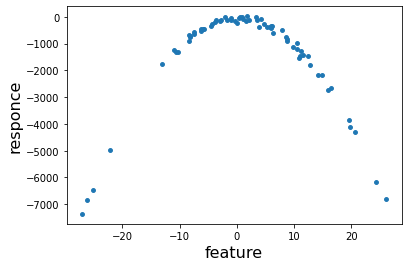

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=15)
plt.xlabel('feature',fontsize=16)
plt.ylabel('responce',fontsize=16)
plt.show() 

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
#Training model
lm = LinearRegression()
lm.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
X_test = np.linspace(-30,30,100)

In [16]:
#Prediction
y_pred = lm.predict(X_test.reshape(-1,1))

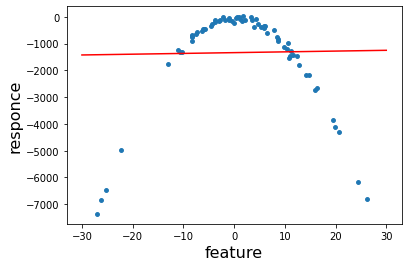

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=15)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('feature',fontsize=16)
plt.ylabel('responce',fontsize=16)
plt.show() 

In [42]:
# наша модель плохо описывает данные. Надо поискать другую, например, полиномиальную регрессию
from sklearn.preprocessing import PolynomialFeatures

#импортируем пайплайн
from sklearn.pipeline import Pipeline

#создаём пайплайн и подгоняем его под данные
pipe = Pipeline ([('transformer', PolynomialFeatures(degree=2)),   ### List of (name, transform) tuples
                  ( 'estimator', LinearRegression())               ### <--  Last object is as Estimator
])

In [43]:
pipe.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('transformer',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [40]:
#predictions
poly_pred=pipe.predict(X_test.reshape(-1,1))

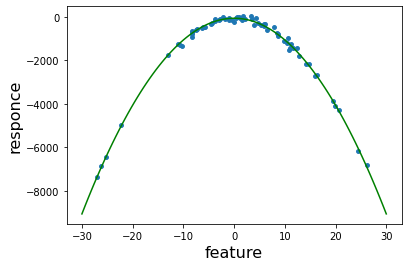

In [41]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=15)
plt.plot(X_test, poly_pred, color='g')
plt.xlabel('feature',fontsize=16)
plt.ylabel('responce',fontsize=16)
plt.show() 